### Try Importing the Vgg16 Module and predict categories

In [11]:
# to draw stuff inline
%matplotlib inline

In [12]:
path = "data/dogscats/"
sample_path = "data/dogscats/sample/"

In [13]:
#standard init code
from __future__ import division, print_function

import os, json, glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [14]:
import utils; reload(utils)
from utils import plots, save_array, load_array

In [15]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [16]:
vgg = Vgg16()

In [17]:
b_size = 8
batches = vgg.get_batches(path+'train', batch_size=b_size)

Found 23000 images belonging to 2 classes.


In [18]:
imgs, labels = next(batches)

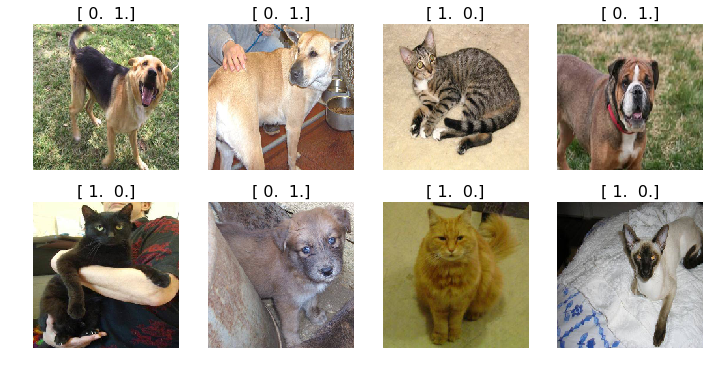

In [19]:
plots(imgs, titles=labels, rows=b_size/4)

In [20]:
vgg.predict(imgs, True)

(array([ 0.8636,  0.4547,  0.5733,  0.747 ,  0.5964,  0.2718,  0.4888,  0.9999], dtype=float32),
 array([163, 273, 281, 242, 285, 184, 283, 284]),
 [u'bloodhound',
  u'dingo',
  u'tabby',
  u'boxer',
  u'Egyptian_cat',
  u'Irish_terrier',
  u'Persian_cat',
  u'Siamese_cat'])

### Finetune the model to distinguish cats v.s. dogs

In [21]:
batch_size = 128

In [22]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)

Found 23000 images belonging to 2 classes.


In [23]:
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 2000 images belonging to 2 classes.


In [24]:
vgg.finetune(batches)

In [25]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
  384/23000 [..............................] - ETA: 730s - loss: 1.1200 - acc: 0.6380

KeyboardInterrupt: 

### Try Vgg on Kaggle Competition

In [27]:
path = "data/dogs_cats_kaggle/"

In [ ]:
batch_size = 128

In [ ]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)

In [ ]:
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

In [ ]:
vgg.finetune(batches)

In [ ]:
vgg.fit(batches, val_batches, nb_epoch=1)

In [ ]:
vgg.model.save_weights('models/cats_dogs_ft2.h5')

In [ ]:
test_batch = vgg.get_batches(path+'test', batch_size=batch_size)

In [ ]:
imgs, labels = next(test_batch)

In [ ]:
plots(imgs, titles=labels)

In [ ]:
import csv, tqdm, keras
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img

In [ ]:
def predict_on_test_set(path, vgg):
    test_imgs = glob.glob(os.path.join(path, 'test/unknown/', '*.jpg'))
    results = []
    with tqdm.tqdm(total=len(test_imgs), unit='images', unit_scale=True) as pbar:
        for n, img_path in enumerate(test_imgs):
            probs = vgg.model.predict(img_to_array(load_img(img_path, target_size=[224, 224])).reshape(1, 3,224,224))
            img_id = os.path.split(img_path)[-1][0:-4]
            results.append({'id': img_id,  'label': probs[0][1]})
            pbar.update(1)
        return results

In [ ]:
results = predict_on_test_set(path, vgg)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame.from_records(results)
df['id'] = pd.to_numeric(df['id'])
df = df.sort_values('id')

In [ ]:
df

In [ ]:
df.to_csv('submission2.csv', index=False)

In [28]:
# Use .test function in vgg16
vgg.model.load_weights('models/cats_dogs_ft2.h5')
batches, preds = vgg.test(path+'test', batch_size = 128)

Found 12500 images belonging to 1 classes.


In [29]:
print(preds[:5])

[[  1.0000e+00   1.1502e-09]
 [  4.8602e-12   1.0000e+00]
 [  8.1384e-06   9.9999e-01]
 [  1.0000e+00   7.7060e-09]
 [  1.0000e+00   2.9602e-08]]


In [32]:
filenames = batches.filenames

In [33]:
temp_result_path = 'temp/'
if not os.path.isdir(temp_result_path):
    os.makedirs(temp_result_path)
save_array(temp_result_path + 'test_preds.dat', preds)
save_array(temp_result_path + 'filenames.dat', filenames)